In [1]:
!pip3 install ipython-sql

In [65]:
import csv, sqlite3
import pandas as pd

conn = sqlite3.connect("FRANCHISE.db")
cur = conn.cursor()

In [66]:
%load_ext sql

%sql sqlite:///FRANCHISE.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [70]:
ccc_df = pd.read_csv("chocolate_chip_cookies.csv")
orc_df = pd.read_csv("oatmeal_raisin_cookies.csv")

ccc_df.rename(columns = {"quantity_sold": "choc_chip_sold"}, inplace = True)
orc_df.rename(columns = {"quantity_sold": "oat_raisin_sold"}, inplace = True)

In [71]:
ccc_df.to_sql("choc_chip", conn, if_exists = "replace", index = False, method = "multi")
orc_df.to_sql("oat_raisin", conn, if_exists = "replace", index = False, method = "multi")

98

The following query will generate the oatmeal raisin sales from the days when there were no chocolate chip cookies. This is because dates were removed from the file when there were none of that item available.

In [72]:
%%sql
select * from oat_raisin
where date not in (
    select date from choc_chip)

 * sqlite:///FRANCHISE.db
Done.


date,oat_raisin_sold
1-Mar,1
12-Apr,4
15-Apr,12
25-Apr,2
26-Apr,1
6-Jun,10
7-Jun,5
22-Aug,2
23-Aug,2


Make a dataframe with all the dates represented between both chocolate chip cookies and oatmeal raisin cookies so it can be used to join the two tables

In [73]:
datelist = ccc_df["date"].tolist() + orc_df["date"].tolist()
alldates = pd.DataFrame(datelist, columns = ["date"])
alldates.to_sql("dates", conn, if_exists = "replace", index = False, method = "multi")

210

In [74]:
%%sql
select dates.date, choc_chip.choc_chip_sold, oat_raisin.oat_raisin_sold from dates
join choc_chip on dates.date = choc_chip.date
join oat_raisin on dates.date = oat_raisin.date

 * sqlite:///FRANCHISE.db
Done.


date,choc_chip_sold,oat_raisin_sold
29-Feb,12,8
4-Mar,25,3
13-Mar,34,9
14-Mar,12,2
15-Mar,17,2
18-Mar,16,7
19-Mar,21,5
20-Mar,6,3
21-Mar,27,7
22-Mar,12,5


In [75]:
query = "select dates.date, choc_chip.choc_chip_sold, oat_raisin.oat_raisin_sold from dates join choc_chip on dates.date = choc_chip.date join oat_raisin on dates.date = oat_raisin.date"
all_cookie_data = pd.read_sql_query(query, conn)

#all_cookie_data.to_csv("cookie_tracker.csv")

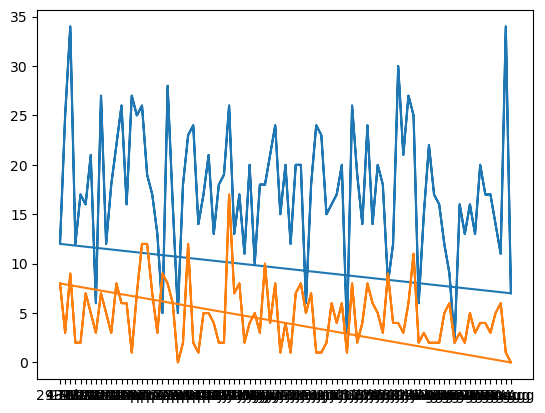

In [76]:
import matplotlib.pyplot as plt

x = all_cookie_data["date"].tolist()
ycc = all_cookie_data["choc_chip_sold"].tolist()
yor = all_cookie_data["oat_raisin_sold"].tolist()

plt.plot(x, ycc)
plt.plot(x, yor)